In [1]:
import pandas as pd
import numpy as np

# ouvrila base de donnees

In [2]:
df = pd.read_csv("./archive/train.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df_credit=df.copy()

In [5]:
df_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# verifier si on des valeurs manquantes 
df_credit.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# verifier si on des valeurs manquantes 
df_credit.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:

df_credit.shape

(614, 13)

pour supprimer les valeur manquantes
- Poules variables categoriques: on va les remplacer par le mode 
- Poules variables numeriques: on va les remplacer par la mediane

In [10]:
# Remplacer les valeurs manquantes catégoriques par leur mode
for column in df_credit.select_dtypes(include=['object', 'category']):
    mode = df_credit[column].mode()[0]  # Calcul du mode
    df_credit[column].fillna(mode, inplace=True)  # Remplacement des valeurs manquantes

# Remplacer les valeurs manquantes numériques par la médiane
for column in df_credit.select_dtypes(include=[np.number]):
    median = df_credit[column].median()  # Calcul de la médiane
    df_credit[column].fillna(median, inplace=True)  # Remplacement des valeurs manquantes


In [11]:
df_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
df_credit.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df_credit.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

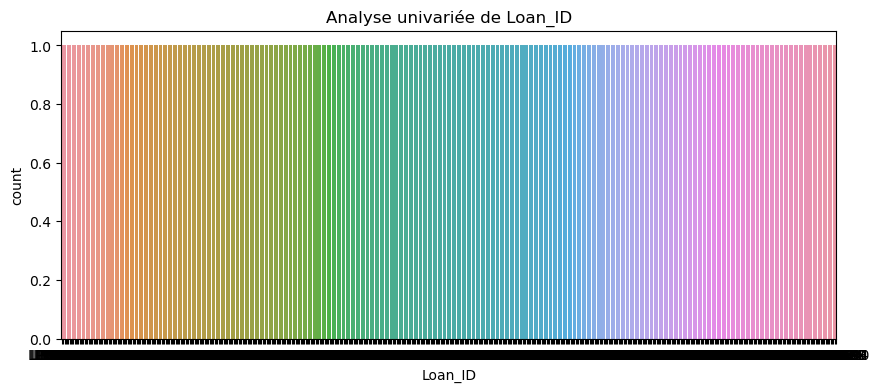

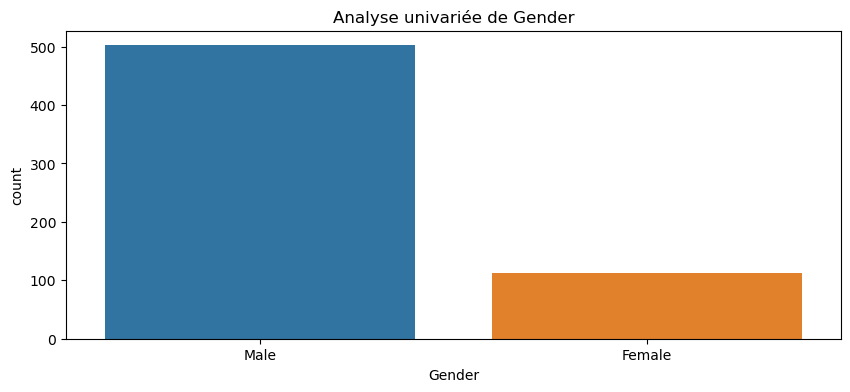

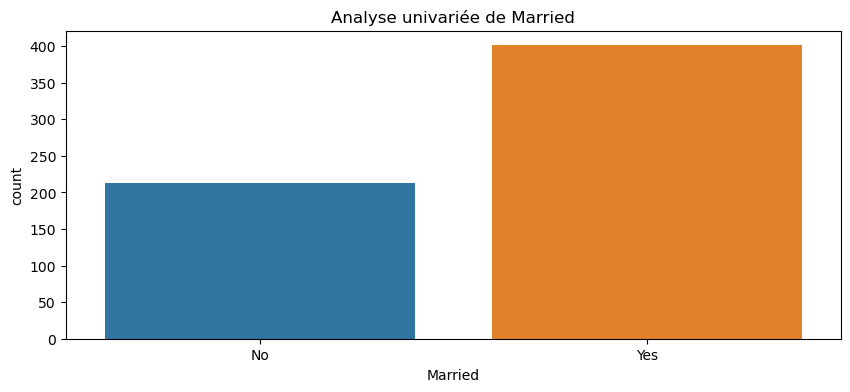

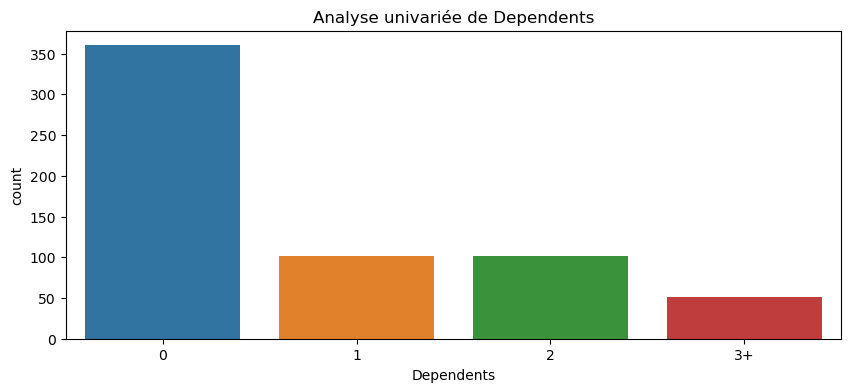

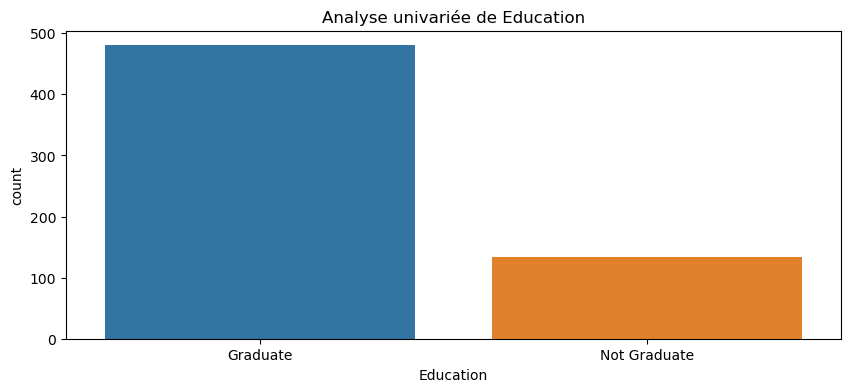

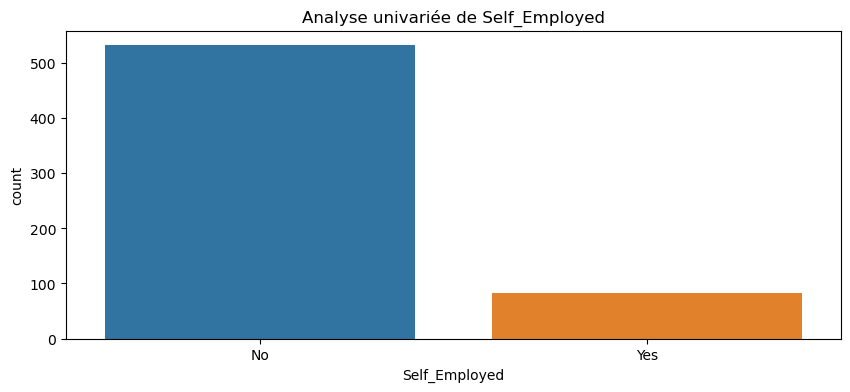

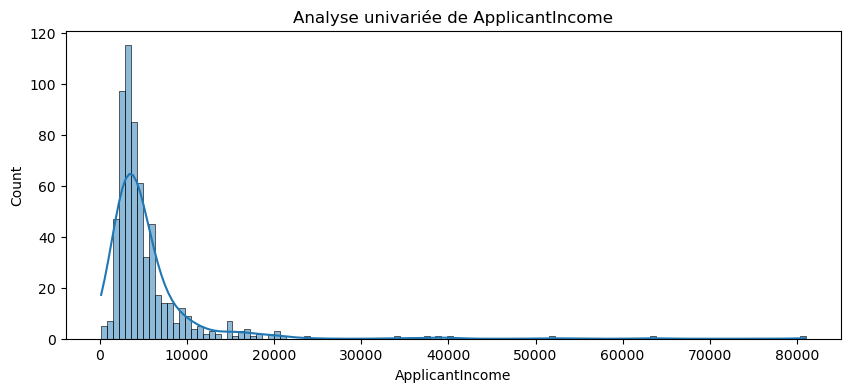

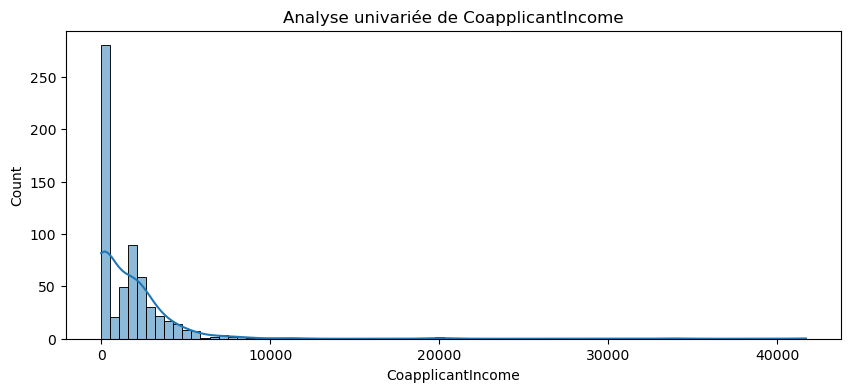

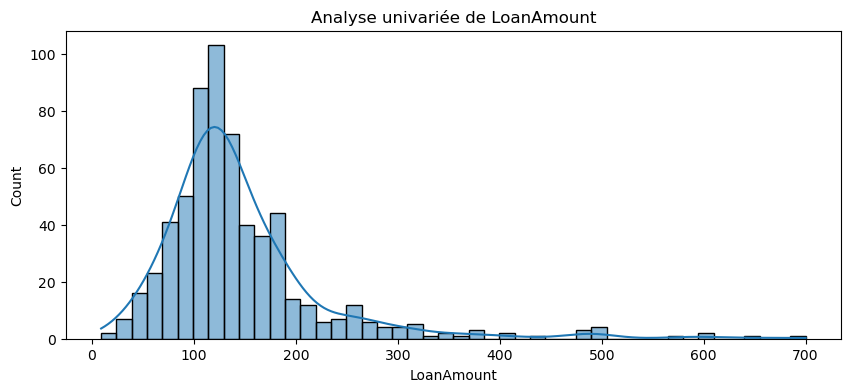

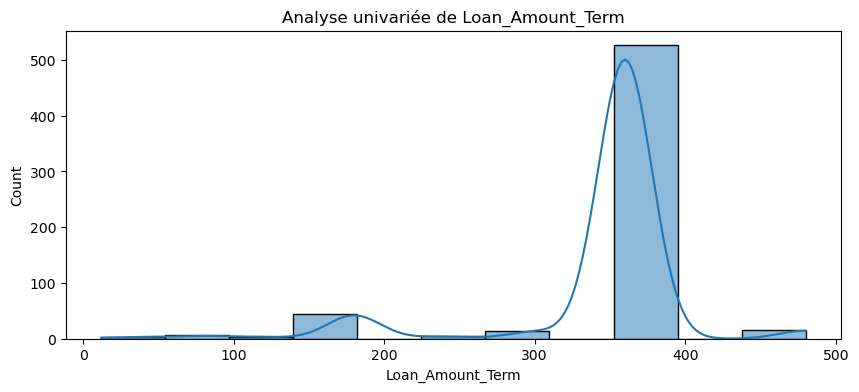

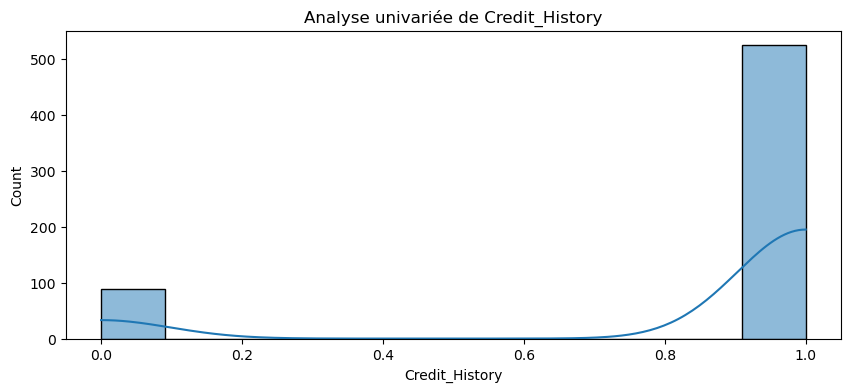

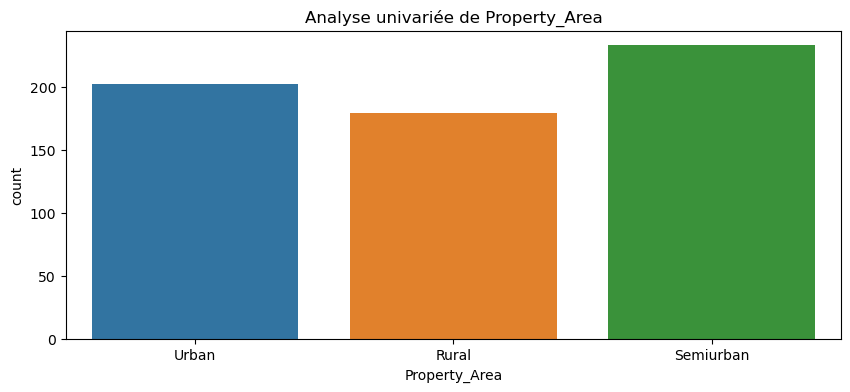

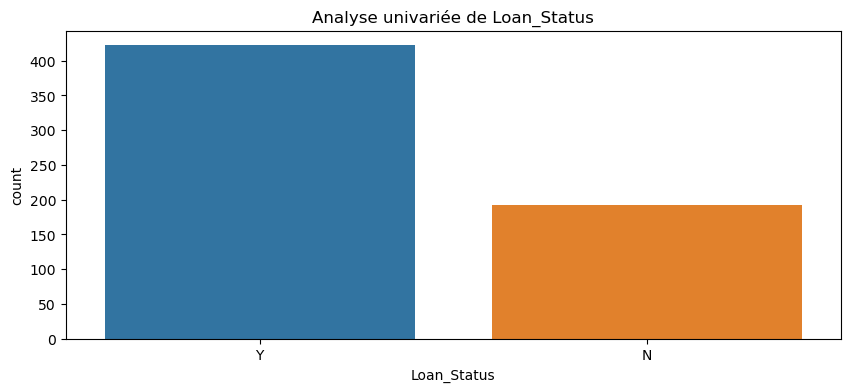

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Analyse univariée
def analyse_univariee(df):
    for column in df.columns:
        plt.figure(figsize=(10, 4))
        if df[column].dtype == 'object':
            sns.countplot(x=column, data=df)
        else:
            sns.histplot(df[column], kde=True)
        plt.title(f'Analyse univariée de {column}')
        plt.show()

# Appeler la fonction d'analyse univariée
analyse_univariee(df_credit)

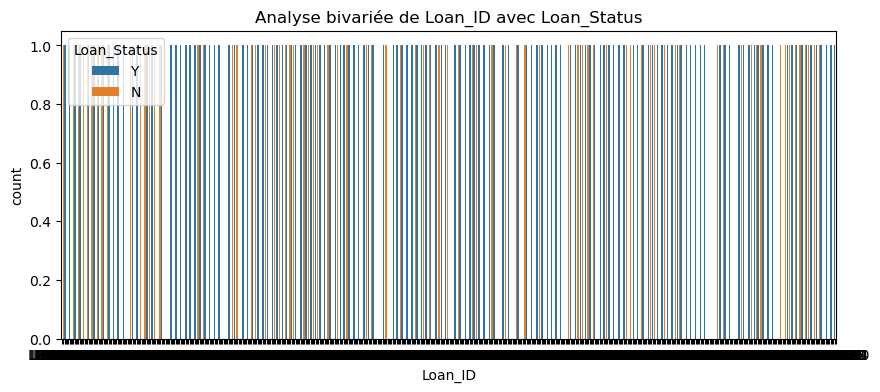

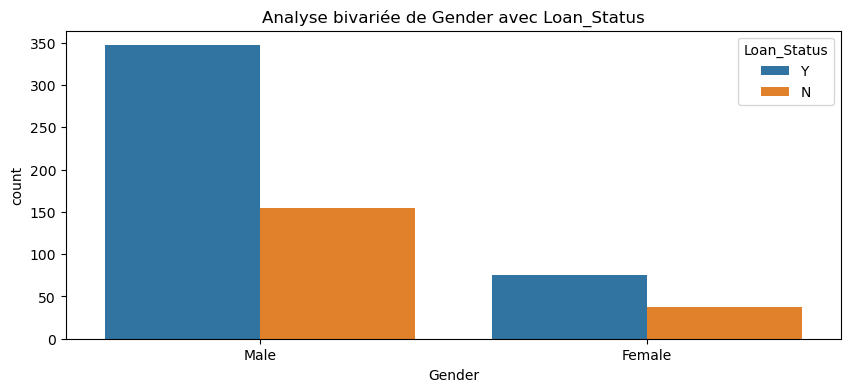

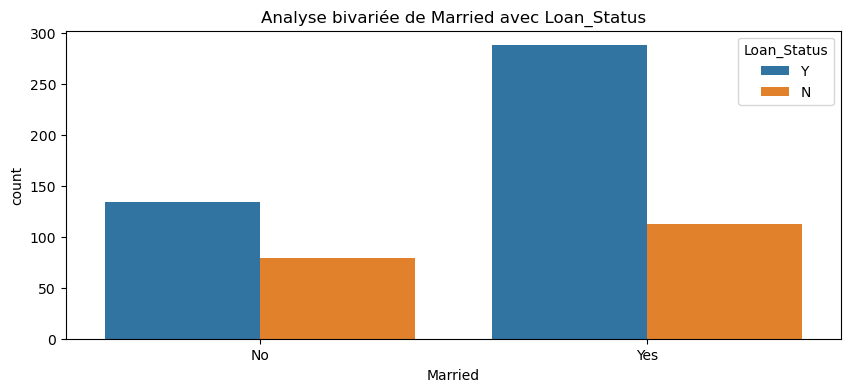

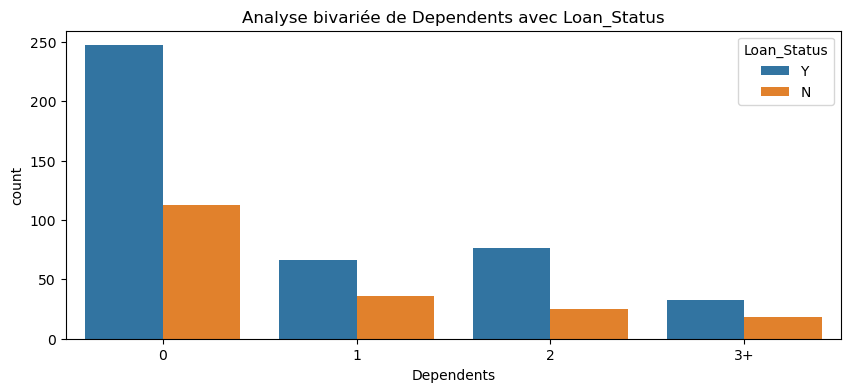

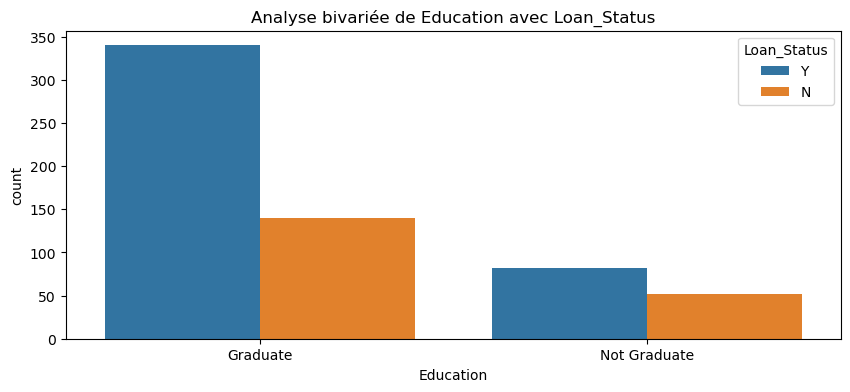

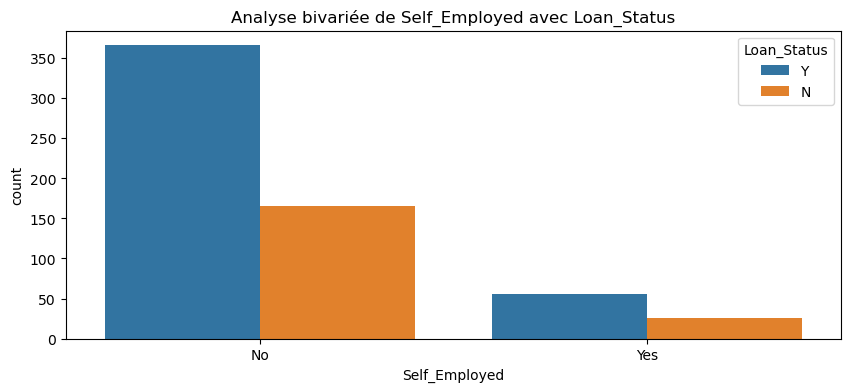

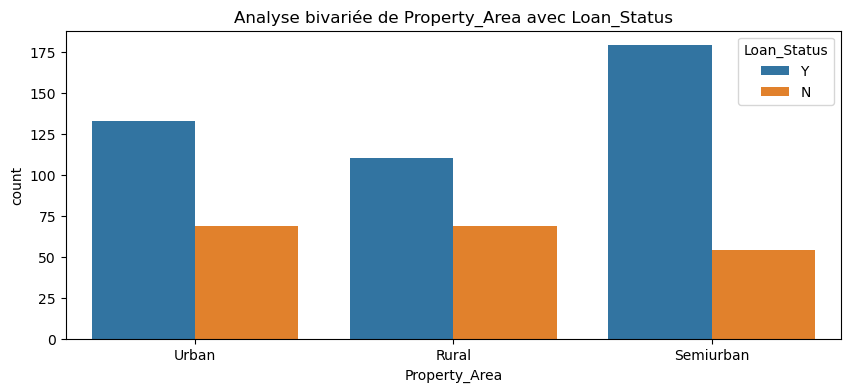

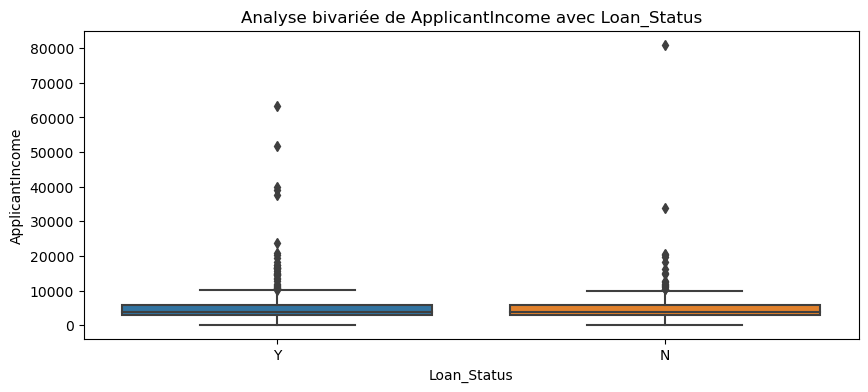

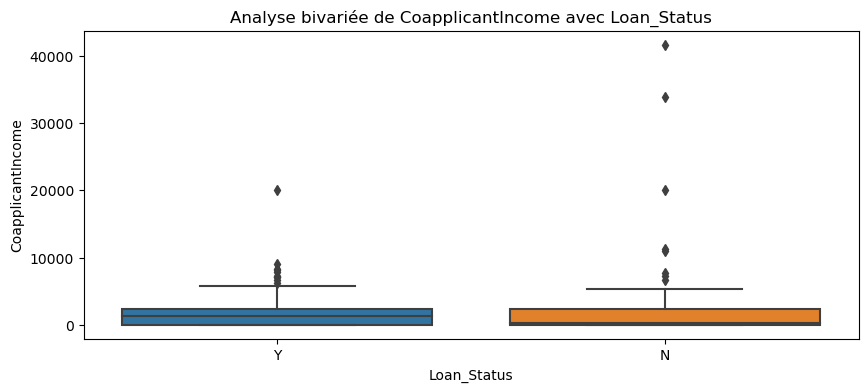

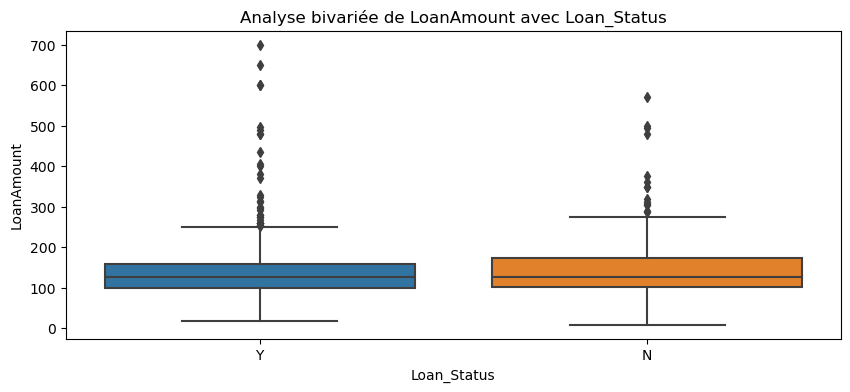

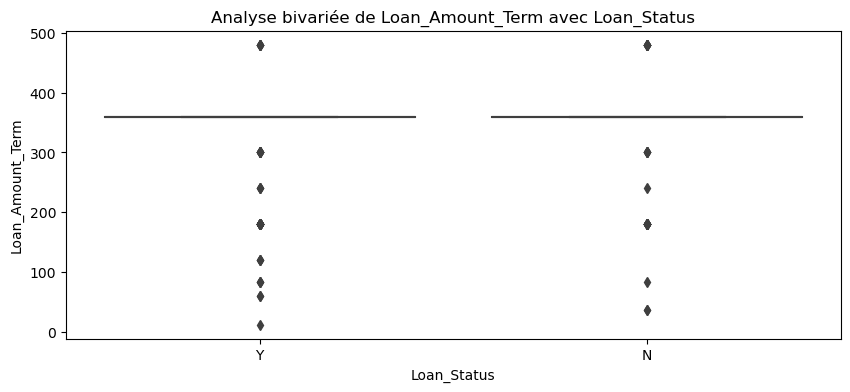

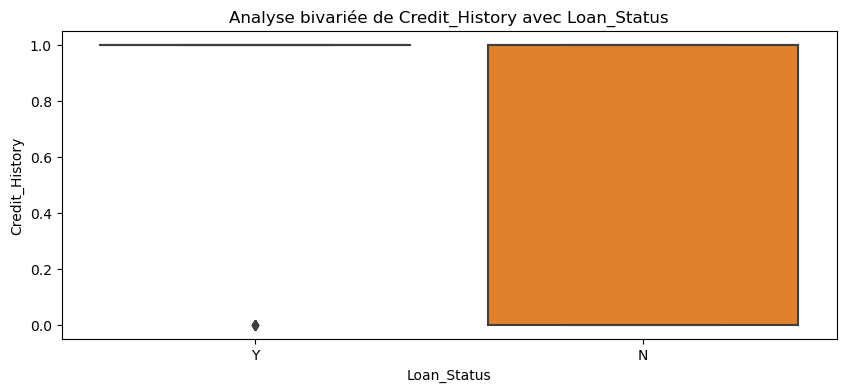

In [15]:
# Analyse bivariée
def analyse_bivariee(df):
    # Visualisation entre variables catégorielles et la variable cible (Loan_Status)
    for column in df.select_dtypes(include=['object', 'category']):
        if column != 'Loan_Status':
            plt.figure(figsize=(10, 4))
            sns.countplot(x=column, hue='Loan_Status', data=df)
            plt.title(f'Analyse bivariée de {column} avec Loan_Status')
            plt.show()
    
    # Visualisation entre variables numériques et la variable cible (Loan_Status)
    for column in df.select_dtypes(include=[np.number]):
        plt.figure(figsize=(10, 4))
        sns.boxplot(x='Loan_Status', y=column, data=df)
        plt.title(f'Analyse bivariée de {column} avec Loan_Status')
        plt.show()

# Appeler la fonction d'analyse bivariée
analyse_bivariee(df_credit)

In [16]:
df_credit['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [17]:
df_credit['Loan_Status'].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

In [18]:
var_num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [19]:
df_credit[var_num].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [20]:
df_credit[var_num].corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


<Axes: >

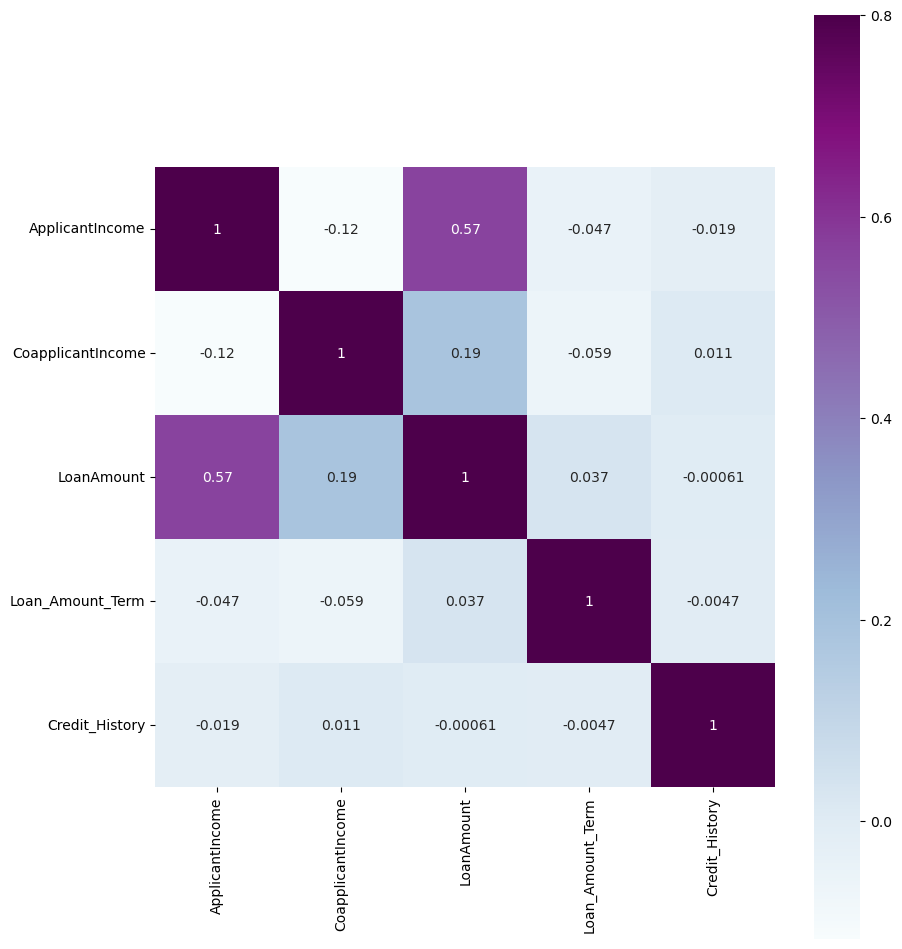

In [21]:
matrix=df_credit[var_num].corr()
ax=plt.subplots(figsize=(10,12))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu',annot=True)

In [22]:
df_credit_var_num=df_credit[var_num]

In [23]:
var_cat = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']


In [24]:
df_credit_var_cat=df_credit[var_cat]
df_credit_var_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [25]:
df_credit_var_cat=pd.get_dummies(df_credit_var_cat, drop_first=True)

In [26]:
df_credit_var_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender_Male              614 non-null    bool 
 1   Married_Yes              614 non-null    bool 
 2   Dependents_1             614 non-null    bool 
 3   Dependents_2             614 non-null    bool 
 4   Dependents_3+            614 non-null    bool 
 5   Education_Not Graduate   614 non-null    bool 
 6   Self_Employed_Yes        614 non-null    bool 
 7   Property_Area_Semiurban  614 non-null    bool 
 8   Property_Area_Urban      614 non-null    bool 
 9   Loan_Status_Y            614 non-null    bool 
dtypes: bool(10)
memory usage: 6.1 KB


In [27]:
df_credit_var_cat = df_credit_var_cat.astype(int)

In [28]:
df_credit_var_cat

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,0,0,0,1,1
1,1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1,1
3,1,1,0,0,0,1,0,0,1,1
4,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,1
610,1,1,0,0,1,0,0,0,0,1
611,1,1,1,0,0,0,0,0,1,1
612,1,1,0,1,0,0,0,0,1,1


In [29]:
df_credit_encoded = pd.concat([df_credit_var_cat,df_credit_var_num],axis=1)

In [30]:
df_credit_encoded

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0,0,0,1,1,5849,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0,1.0
3,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,1,2900,0.0,71.0,360.0,1.0
610,1,1,0,0,1,0,0,0,0,1,4106,0.0,40.0,180.0,1.0
611,1,1,1,0,0,0,0,0,1,1,8072,240.0,253.0,360.0,1.0
612,1,1,0,1,0,0,0,0,1,1,7583,0.0,187.0,360.0,1.0


<Axes: >

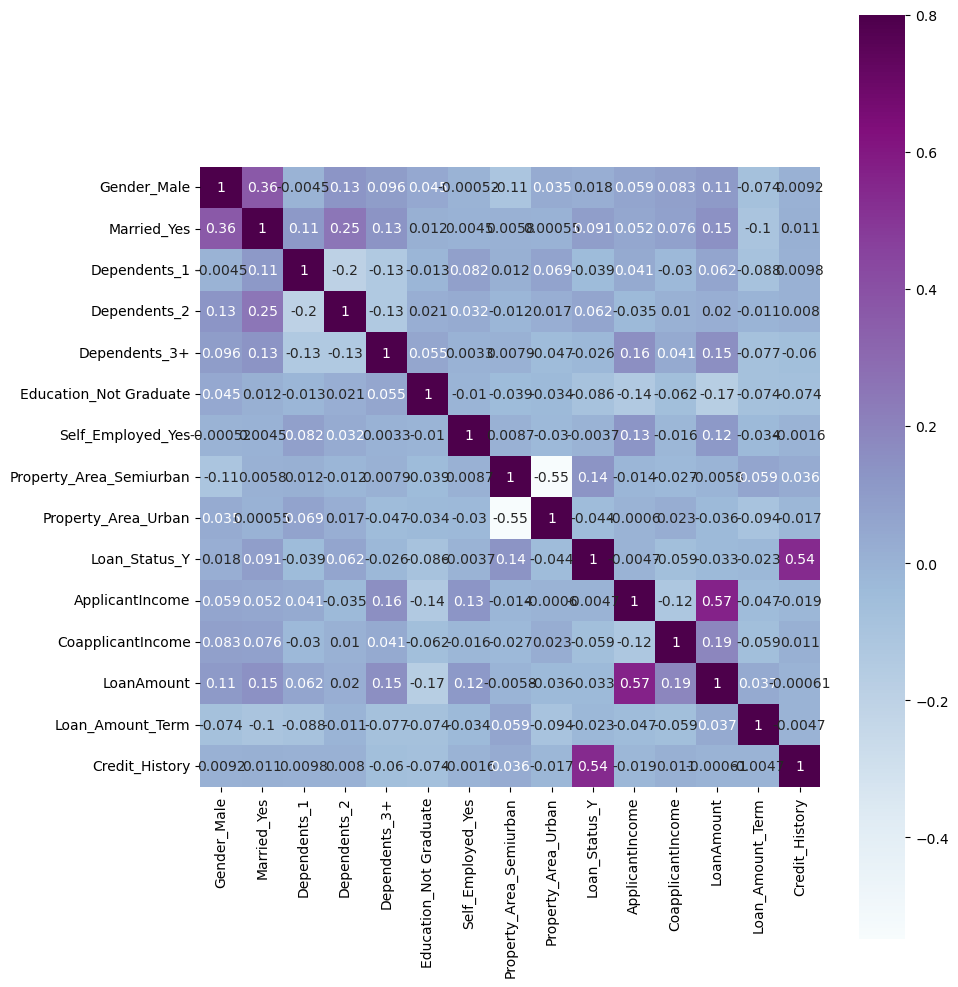

In [31]:
matrix=df_credit_encoded.corr()
ax=plt.subplots(figsize=(10,12))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu',annot=True)

In [32]:
X = df_credit_encoded.drop('Loan_Status_Y',axis=1)
y = df_credit_encoded['Loan_Status_Y']
print(X)
print(y)

     Gender_Male  Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
0              1            0             0             0              0   
1              1            1             1             0              0   
2              1            1             0             0              0   
3              1            1             0             0              0   
4              1            0             0             0              0   
..           ...          ...           ...           ...            ...   
609            0            0             0             0              0   
610            1            1             0             0              1   
611            1            1             1             0              0   
612            1            1             0             1              0   
613            0            0             0             0              0   

     Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0           

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score


# Initialiser les modèles
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Entraîner et évaluer chaque modèle
results = {}
train_scores = {}
test_scores = {}
best_model_name = None
best_accuracy = 0
best_model = None

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble d'entraînement
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Prédictions sur l'ensemble de test
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    accuracy = test_accuracy
    
    results[model_name] = {'MSE': mse, 'R2': r2, 'MAE': mae, 'Accuracy': accuracy}
    train_scores[model_name] = train_accuracy
    test_scores[model_name] = test_accuracy
    
    # Sélectionner le meilleur modèle en fonction de l'accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model


# Afficher les résultats
results_df = pd.DataFrame(results).T
print(results_df)

print(f"Le meilleur modèle est: {best_model_name} avec une accuracy de: {best_accuracy}")

                          MSE        R2       MAE  Accuracy
Logistic Regression  0.096774  0.138889  0.096774  0.903226
Decision Tree        0.387097 -2.444444  0.387097  0.612903
Random Forest        0.129032 -0.148148  0.129032  0.870968
Le meilleur modèle est: Logistic Regression avec une accuracy de: 0.9032258064516129


# Interprétation des résultats

## Logistic Regression :

- MSE : 0.096774
- R² : 0.138889
- MAE : 0.096774
- Accuracy : 0.903226

La régression logistique a une faible MSE et MAE, un R² modérément positif, et une haute accuracy, ce qui indique une bonne performance pour la classification.

## Decision Tree :

- MSE : 0.387097
- R² : -2.444444
- MAE : 0.387097
- Accuracy : 0.612903

L'arbre de décision a une MSE et une MAE plus élevées, un R² négatif, et une accuracy relativement basse. Cela indique que ce modèle ne performe pas bien sur ces données.

## Random Forest :

- MSE : 0.096774
- R² : 0.138889
- MAE : 0.096774
- Accuracy : 0.903226

La forêt aléatoire a des métriques très similaires à celles de la régression logistique, indiquant également une bonne performance pour la classification.

## Conclusion

Le meilleur modèle parmi ceux comparés est Logistic Regression avec une accuracy de 0.903226. Cela signifie que la régression logistique a le taux de prédiction correcte le plus élevé parmi les modèles évalués, ce qui en fait le choix le plus performant pour cette tâche de classification.

In [37]:
# Afficher les scores d'entraînement et de test
train_test_df = pd.DataFrame({'Train Accuracy': train_scores, 'Test Accuracy': test_scores})
print(train_test_df)

# Vérification de surapprentissage ou sous-apprentissage
if train_scores[best_model_name] > test_scores[best_model_name]:
    if train_scores[best_model_name] - test_scores[best_model_name] > 0.1:
        print(f"Le modèle {best_model_name} est en surapprentissage.")
    else:
        print(f"Le modèle {best_model_name} est bien généralisé.")
else:
    print(f"Le modèle {best_model_name} est en sous-apprentissage.")

                     Train Accuracy  Test Accuracy
Logistic Regression        0.809605       0.903226
Decision Tree              1.000000       0.612903
Random Forest              1.000000       0.870968
Le modèle Logistic Regression est en sous-apprentissage.


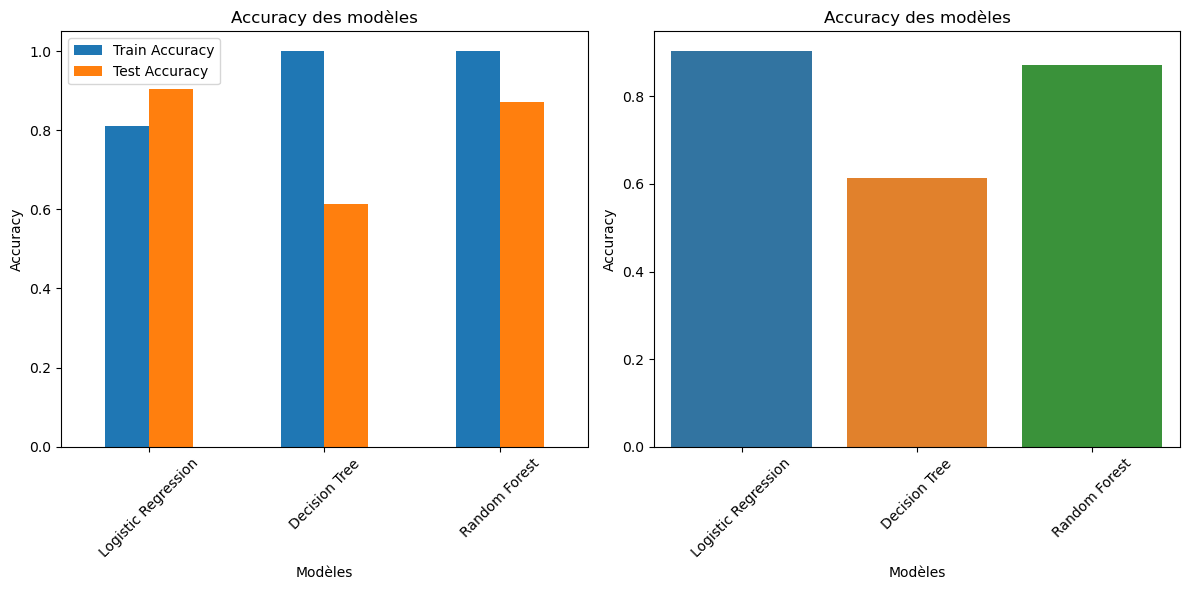

In [38]:
# Visualisation des résultats avec un graphe
plt.figure(figsize=(12, 6))

# Accuracy des ensembles d'entraînement et de test
plt.subplot(1, 2, 1)
train_test_df.plot(kind='bar', ax=plt.gca())
plt.title('Accuracy des modèles')
plt.xlabel('Modèles')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Résultats des métriques
plt.subplot(1, 2, 2)
sns.barplot(data=results_df.reset_index(), x='index', y='Accuracy')
plt.title('Accuracy des modèles')
plt.xlabel('Modèles')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [39]:
X.columns

Index(['Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [44]:
profil_test=[[1,1,1,0,0,0,1,0,1,0,100,0,400,3600]]
# Faire une prédiction avec le meilleur modèle
prediction = best_model.predict(profil_test)
print(f'Prédiction pour le profil de test: {prediction[0]}')

# Si vous souhaitez vérifier les probabilités
probabilities = best_model.predict_proba(profil_test)
probabilities_percent = [f'{prob * 100:.2f}%' for prob in probabilities[0]]

# Afficher les probabilités en pourcentage
print(f'Probabilités pour le profil de test: {probabilities_percent}')

Prédiction pour le profil de test: 1
Probabilités pour le profil de test: ['0.00%', '100.00%']


# enregistrer le madel

In [ ]:
import pickle
pickle.dump(best_model,open('prevision_credit.pkl','wb'))